In [1]:
!nvidia-smi

Fri Mar  1 11:14:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0
torch:  2.1 ; cuda:  2.1.2


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


### Installing YOLOv8

In [4]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


### Installing Supervision

In [5]:
!pip install supervision==0.7.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.7.0


### Downloading Data

In [6]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr" -O market-square.mp4 && rm -rf /tmp/cookies.txt

/kaggle/working
--2024-03-01 11:15:10--  https://docs.google.com/uc?export=download&confirm=&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr
Resolving docs.google.com (docs.google.com)... 172.253.114.100, 172.253.114.113, 172.253.114.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.114.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr&export=download [following]
--2024-03-01 11:15:10--  https://drive.usercontent.google.com/download?id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.183.132, 2607:f8b0:4001:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21302928 (20M) [video/mp4]
Saving to: 'market-square.mp4'

market-square.mp4   100%[===================>]  20.3

In [7]:
MARKET_SQUARE_VIDEO_PATH = f"{HOME}/market-square.mp4"

In [8]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm" -O mall.mp4 && rm -rf /tmp/cookies.txt

/kaggle/working
--2024-03-01 11:15:17--  https://docs.google.com/uc?export=download&confirm=&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm
Resolving docs.google.com (docs.google.com)... 173.194.193.139, 173.194.193.102, 173.194.193.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.193.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm&export=download [following]
--2024-03-01 11:15:17--  https://drive.usercontent.google.com/download?id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.183.132, 2607:f8b0:4001:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103282086 (98M) [video/mp4]
Saving to: 'mall.mp4'

mall.mp4            100%[===================>]  98.50M   237

In [9]:
MALL_VIDEO_PATH = f"{HOME}/mall.mp4"

In [10]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz" -O subway.mp4 && rm -rf /tmp/cookies.txt

/kaggle/working
--2024-03-01 11:15:23--  https://docs.google.com/uc?export=download&confirm=&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz
Resolving docs.google.com (docs.google.com)... 173.194.193.139, 173.194.193.102, 173.194.193.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.193.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz&export=download [following]
--2024-03-01 11:15:23--  https://drive.usercontent.google.com/download?id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.183.132, 2607:f8b0:4001:c2e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2422 (2.4K) [text/html]
Saving to: 'subway.mp4'

subway.mp4          100%[===================>]   2.37K  --.-KB

In [11]:
SUBWAY_VIDEO_PATH = f"{HOME}/subway.mp4"

### Problem : Detecting a customer when he enters a polygon zone

In [12]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 168MB/s]


Let's start vanilla YOLOv8 inference pipeline

In [13]:
import numpy as np
CLASS_NAMES_DICT = model.model.names
selected_classes = [0]

In [14]:


# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.plot_image(frame, (16, 16))


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 86.8ms
Speed: 20.3ms preprocess, 86.8ms inference, 610.4ms postprocess per image at shape (1, 3, 736, 1280)


In [15]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[np.isin(detections.class_id, selected_classes)]

# annotate
#label_annotator = sv.LabelAnnotator(text_position=sv.Position.TOP)
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(frame, (16, 16))


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 30.0ms
Speed: 8.1ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


We will create a polygon zone in the ground of alley and we will detect the bottom center of the bounding box if it's present in the polygon zone then counter will increase


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 30.0ms
Speed: 11.3ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


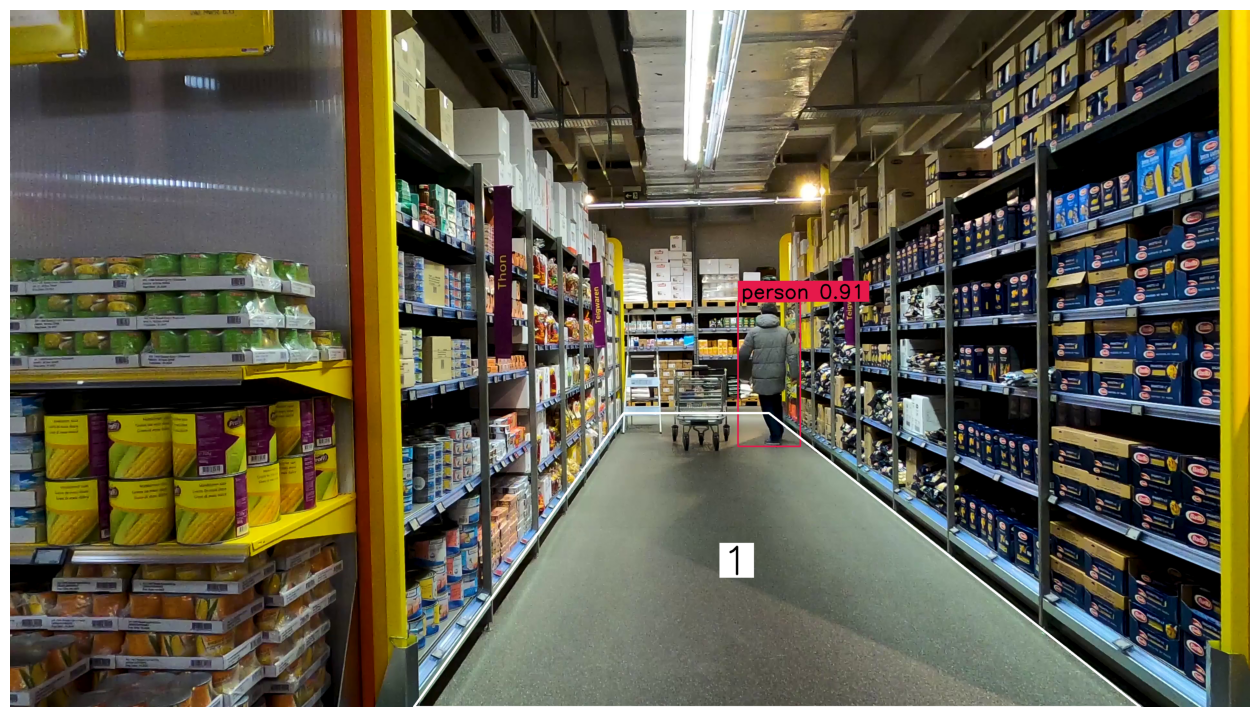

In [16]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [1900, 1250],
    [2350, 1250],
    [3500, 2160],
    [1250, 2160]
])
video_info = sv.VideoInfo.from_video_path(MALL_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)

# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[np.isin(detections.class_id, selected_classes)]
zone.trigger(detections=detections)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.plot_image(frame, (16, 16))

Change the loaction of the polygon zone a little bit and test it again !!


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 30.0ms
Speed: 11.2ms preprocess, 30.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


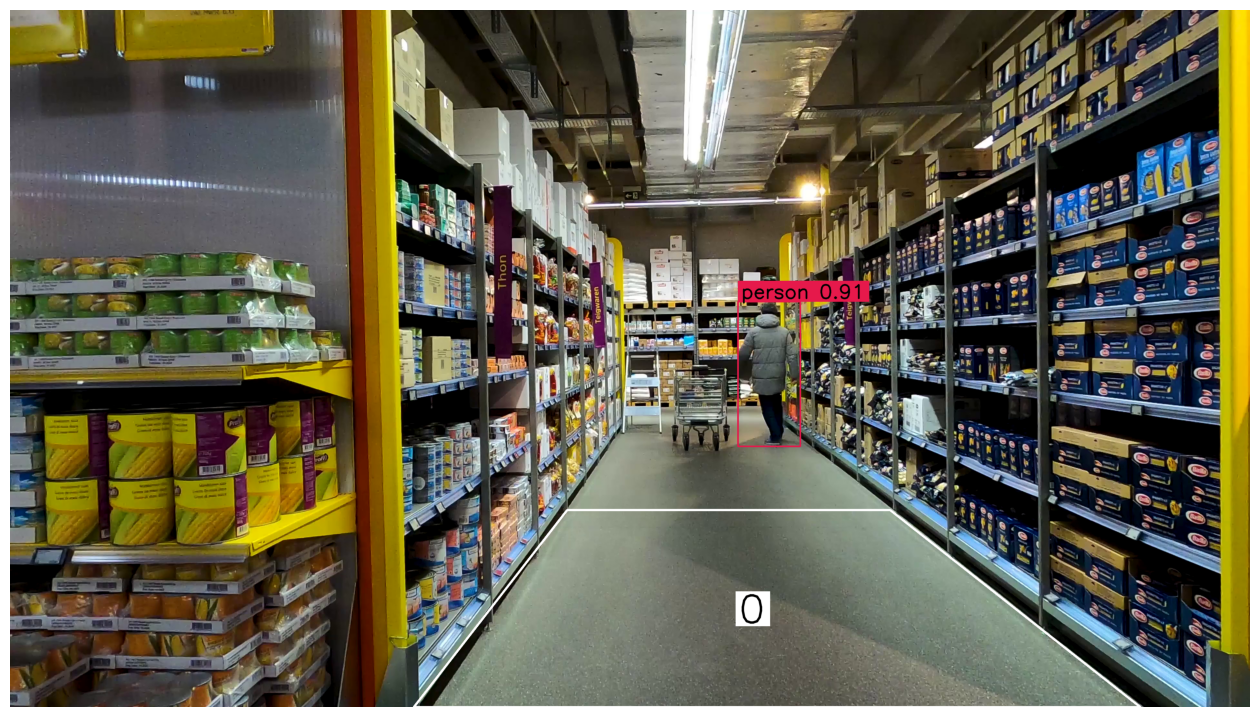

In [17]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [1725, 1550],
    [2725, 1550],
    [3500, 2160],
    [1250, 2160]
])
video_info = sv.VideoInfo.from_video_path(MALL_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)

# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[np.isin(detections.class_id, selected_classes)]
zone.trigger(detections=detections)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.plot_image(frame, (16, 16))

### Processing the whole video

In [23]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [1725, 1550],
    [2725, 1550],
    [3500, 2160],
    [1250, 2160]
])
video_info = sv.VideoInfo.from_video_path(MALL_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)

def process_frame(frame: np.ndarray,_)-> np.ndarray:

    # detect
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_yolov8(results)
    detections = detections[np.isin(detections.class_id, selected_classes)]
    zone.trigger(detections=detections)

    # annotate
    box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
    labels = [
        f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
        for confidence, class_id in zip(detections.confidence, detections.class_id)
    ]
    frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
    frame = zone_annotator.annotate(scene=frame)
    return frame
sv.process_video(
    source_path = MALL_VIDEO_PATH,
    target_path=f"{HOME}/mall-result.mp4",
    callback = process_frame
)
from IPython import display
display.clear_output()
print("VIDEO PROCESSING COMPLETED")